c:\Users\mic\OneDrive\Documents\001 VWL\Sem 6\Thesis\BA_DML\BA_DML\Simple_Model\Elastic_Net\data_generation.py:14: RuntimeWarning: invalid value encountered in sqrt
  return 2*np.abs(x[:,0]*x[:,4]) - np.exp(x[:,1]*x[:,5]) + 2*x[:,2]**0.5 + np.sin(x[:,2]*x[:,3]) - x[:,0]*x[:,2]


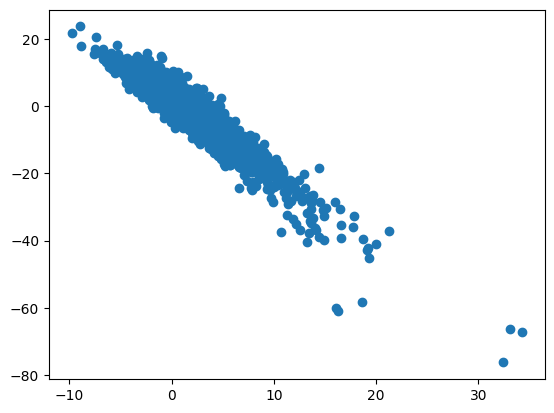

In [69]:
from data_generation import get_data
import numpy as np

rng = np.random.default_rng(seed=42)

y_data, d_data, x_data = get_data(10000,rng)
plt.scatter(d_data, y_data)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from scipy.stats import norm

with open('results_eln.pkl', 'rb') as pickle_file:
    results_dict_ = pickle.load(pickle_file)

In [74]:
print(results_dict_["ate_estimates"].mean(axis=0))
print(results_dict_["se_estimates"].mean(axis=0))
print(results_dict_["mses"].mean(axis=0))

[-2.06294148]
[0.05008145]
[8.98283383 1.85079466]


In [75]:
import pickle

with open('opt_params_eln.pkl', 'rb') as pickle_file:
    opt_dict_ = pickle.load(pickle_file)

print(opt_dict_)

{'l': {'alpha': np.float64(0.010554315732879247), 'l1_ratio': np.float64(0.91)}, 'm': {'alpha': np.float64(0.014854232640000178), 'l1_ratio': np.float64(0.96)}}


In [30]:
import numpy as np

from data_generation import g, d, get_data

rng = np.random.default_rng(seed=42)

y_data, d_data, x_data = get_data(100000, rng)

def mm_ate(y_data, d_data, x_data):

    # score_a = np.dot(d_data - d(x_data), d_data - d(x_data))
    # score_b = np.dot(d_data - d(x_data), y_data - g(x_data) - (-2.0 * d(x_data)))
    E_Y_given_X = g(x_data) + (-2.0 * d(x_data))
    E_D_given_X = d(x_data)

    # Residuals
    D_res = np.mean(d_data - E_D_given_X)
    Y_res = np.mean(y_data - E_Y_given_X)

    # Oracle estimate
    coef = np.mean(np.multiply(D_res, Y_res)) / np.mean(np.multiply(D_res, D_res))
    # coef = score_b /score_a

    return coef

mm_ate(y_data, d_data, x_data)

np.float64(1.3066846709110735)

In [ ]:
print(y_data[0], d_data[0])

In [ ]:
print(x_data[0])